In [19]:
import os
file_path = "/Users/nayoungmin/Desktop/Capstone/image"
file_names = [f for f in os.listdir(file_path) if os.path.isdir(os.path.join(file_path, f))]

file_Path = []
# 장소별 데이터 수
for place in file_names:
    PATH = os.path.join(file_path, place)
    print(str(place), ":", str(len(os.listdir(PATH))))
    file_Path.append(PATH)

print(file_Path)


theater : 865
cable_car : 307
cherryblossom : 442
ice_rink : 82
city_river : 791
tower : 318
busy_street : 335
cruise_ship : 366
maple : 341
amusement_park : 348
railway : 434
night_view : 431
nature : 705
sunset : 393
stone_wall : 704
waterpark : 320
castle : 363
aquarium : 334
picnic : 410
building : 454
traditional_culture : 301
['/Users/nayoungmin/Desktop/Capstone/image/theater', '/Users/nayoungmin/Desktop/Capstone/image/cable_car', '/Users/nayoungmin/Desktop/Capstone/image/cherryblossom', '/Users/nayoungmin/Desktop/Capstone/image/ice_rink', '/Users/nayoungmin/Desktop/Capstone/image/city_river', '/Users/nayoungmin/Desktop/Capstone/image/tower', '/Users/nayoungmin/Desktop/Capstone/image/busy_street', '/Users/nayoungmin/Desktop/Capstone/image/cruise_ship', '/Users/nayoungmin/Desktop/Capstone/image/maple', '/Users/nayoungmin/Desktop/Capstone/image/amusement_park', '/Users/nayoungmin/Desktop/Capstone/image/railway', '/Users/nayoungmin/Desktop/Capstone/image/night_view', '/Users/nayoung

In [20]:
#!pip install split-folders

import splitfolders   # 입력된 비율을 기준으로 데이터셋을 분할하는 함수
input_folder = "/Users/nayoungmin/Desktop/Capstone/image"
output = "/Users/nayoungmin/Desktop/Capstone/splited_image_is" # where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=777, ratio=(0.7,0.1, 0.2)) # train,test를 8:2 split 후, train,val을 9:1로 split

### K-fold Cross-Validation
- 폴더 나누기 
- 데이터 augmentation
- 모델 정의
- 이미지 확인
- 학습

In [21]:
import os
import shutil
from pathlib import Path
from sklearn.metrics import classification_report
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.metrics import AUC
from keras.callbacks import EarlyStopping  


FILE_PATH = '/Users/nayoungmin/Desktop/Capstone/splited_image_is'
TRAIN_PATH = FILE_PATH + '/train'
VAL_PATH = FILE_PATH + '/val'
TEST_PATH = FILE_PATH +'/test'

# Set the hyperparameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 256
N_EPOCH = 30
LR = 0.005

In [22]:
trainGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
valGen = ImageDataGenerator(
    rescale=1./255)
testGen = ImageDataGenerator(
    rescale=1./255)

train_generator = trainGen.flow_from_directory(
    TRAIN_PATH,
    class_mode="categorical",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    batch_size=BATCH_SIZE)

validation_generator = valGen.flow_from_directory(
    VAL_PATH,
    class_mode="categorical",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    batch_size=BATCH_SIZE)

    # initialize the testing generator
test_generator = testGen.flow_from_directory(
    TEST_PATH,
    class_mode="categorical",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    batch_size=BATCH_SIZE)

# ResNet50V2 모델을 불러오고, 그 모델의 출력을 활용하여 새로운 fully connected layer를 추가
resnet = ResNet50V2(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))

x = resnet.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x =  Dense(512, activation='relu', input_dim= (224,224,3))(x)
x = BatchNormalization()(x)
x =  Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x =  Dense(128, activation='relu')(x) # 새로운 Dense 레이어 추가
x = BatchNormalization()(x)
x =  Dense(21, activation='softmax')(x)
    
model = Model(inputs=resnet.input, outputs=x)

Found 6315 images belonging to 21 classes.
Found 1346 images belonging to 21 classes.
Found 1824 images belonging to 21 classes.


================train_image================
(256, 224, 224, 3)


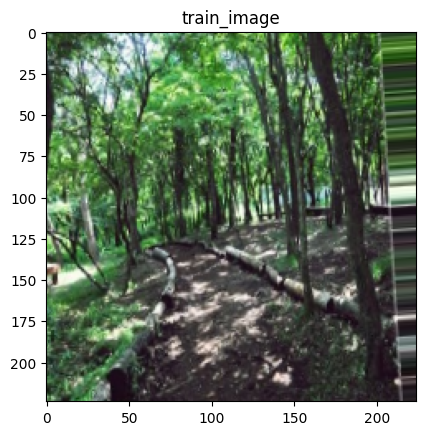

(256, 224, 224, 3)


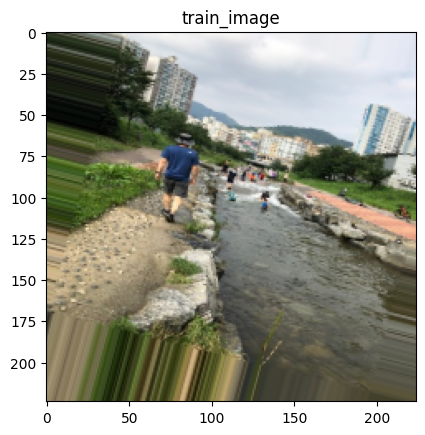

[ 0  0  0 ... 20 20 20]
================validation_image================
(256, 224, 224, 3)


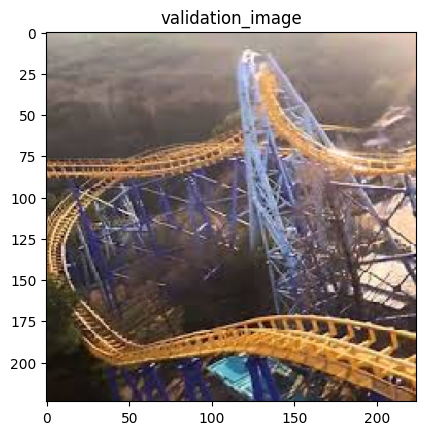

(256, 224, 224, 3)


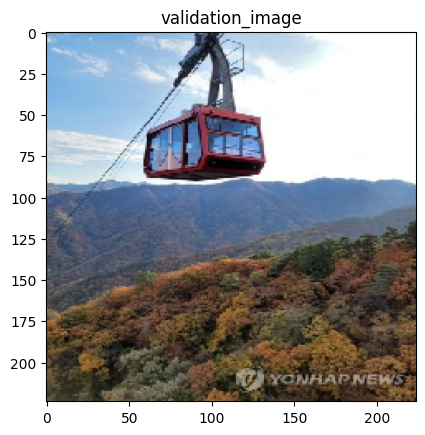

[ 0  0  0 ... 20 20 20]
================test_image================
(256, 224, 224, 3)


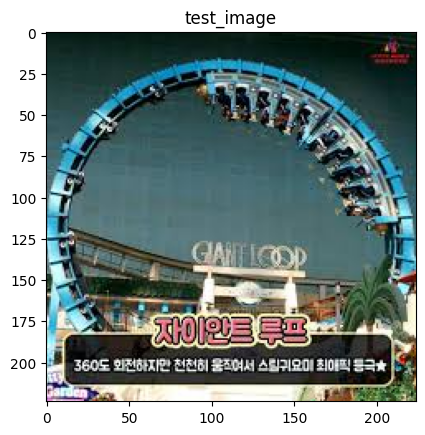

(256, 224, 224, 3)


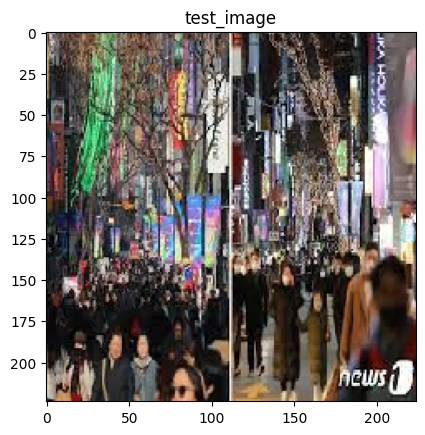

[ 0  0  0 ... 20 20 20]


In [23]:
import matplotlib.pyplot as plt

# train 이미지 확인하기
print('================train_image================')
for _ in range(2):
    img, label = train_generator.next()
    print(img.shape)   #  (1,224,224,3) = (이미지의 개수, 높이, 너비, 채널 수)  / RGB 색상 채널이 3개 있으므로 3이다.
    #print(label)
    plt.title('train_image')
    plt.imshow(img[0])
    plt.show()

labels = validation_generator.classes
print(labels)


# validation 이미지 확인하기
print('================validation_image================')
for _ in range(2):
    img, label = validation_generator.next()
    print(img.shape)   #  (1,224,224,3) = (이미지의 개수, 높이, 너비, 채널 수)  / RGB 색상 채널이 3개 있으므로 3이다.
    #print(label)
    plt.title('validation_image')
    plt.imshow(img[0])
    plt.show()

labels = validation_generator.classes
print(labels)



# test 이미지 확인하기
print('================test_image================')
for _ in range(2):
    img, label = test_generator.next()
    print(img.shape)   #  (1,224,224,3) = (이미지의 개수, 높이, 너비, 채널 수)  / RGB 색상 채널이 3개 있으므로 3이다.
    # print(label)
    plt.title('test_image')
    plt.imshow(img[0])
    plt.show()

labels = test_generator.classes
print(labels)

In [24]:
# Define the number of folds
k = 10

# Get the filenames of all the images in the dataset
image_paths = list(Path('/Users/nayoungmin/Desktop/Capstone/image').glob("*/*"))

# Shuffle the list of filenames
np.random.shuffle(image_paths)

# Split the list of filenames into k-folds
kfold = KFold(n_splits=k, shuffle=True)


# Loop through each fold
for fold, (train_indexes, val_indexes) in enumerate(kfold.split(image_paths)):
    # Get the filenames for the training and validation sets
    train_files = [str(image_paths[i]) for i in train_indexes]
    val_files = [str(image_paths[i]) for i in val_indexes]

    # Create a directory for the training set and copy the images
    train_dir = f"fold_{fold+1}/train"
    os.makedirs(train_dir, exist_ok=True)
    for file in train_files:
        shutil.copy(file, train_dir)

    # Create a directory for the validation set and copy the images
    val_dir = f"fold_{fold+1}/val"
    os.makedirs(val_dir, exist_ok=True)
    for file in val_files:
        shutil.copy(file, val_dir)

    
    # Train the model on the training set
    # 기존 학습된 layer들을 freazing(새로운 layer들만 학습하도록)
    for layer in resnet.layers:
        layer.trainable = False

    # compile the model
    # 모델의 최적 학습률을 찾는 기법
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=LR,
        decay_steps=10000,
        decay_rate=0.96)

    opt = Adam(learning_rate=lr_schedule)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
        metrics=["accuracy",AUC(multi_label=True,num_labels=21,name='AUC')])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

    H = model.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.samples//BATCH_SIZE,
        epochs = N_EPOCH,  # epochs = N_EPOCH
        validation_data = validation_generator,
        validation_steps = validation_generator.samples // BATCH_SIZE)
    
    # Evaluate the model on the validation set
    predictions = model.predict_generator(test_generator)
    y_true = test_generator.classes
    y_pred = np.argmax(predictions, axis=1)
    report = classification_report(y_true, y_pred)
    print(report)



/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/30
24/24 [==============================] - 46s 2s/step - loss: 1.0045 - accuracy: 0.7074 - AUC: 0.9602 - val_loss: 1.9787 - val_accuracy: 0.7203 - val_AUC: 0.8764
Epoch 2/30
24/24 [==============================] - 43s 2s/step - loss: 0.4903 - accuracy: 0.8434 - AUC: 0.9893 - val_loss: 0.6645 - val_accuracy: 0.8547 - val_AUC: 0.9274
Epoch 3/30
24/24 [==============================] - 44s 2s/step - loss: 0.3859 - accuracy: 0.8794 - AUC: 0.9930 - val_loss: 0.3742 - val_accuracy: 0.9078 - val_AUC: 0.9372
Epoch 4/30
24/24 [==============================] - 44s 2s/step - loss: 0.3369 - accuracy: 0.8894 - AUC: 0.9945 - val_loss: 0.3548 - val_accuracy: 0.9031 - val_AUC: 0.9385
Epoch 5/30
24/24 [==============================] - 44s 2s/step - loss: 0.3110 - accuracy: 0.9006 - AUC: 0.9950 - val_loss: 0.3171 - val_accuracy: 0.9273 - val_AUC: 0.9404
Epoch 6/30
24/24 [==============================] - 44s 2s/step - loss: 0.2833 - accuracy: 0.9074 - AUC: 0.9954 - val_loss: 0.2854 - val_acc

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.91      0.83      0.87        71
           1       0.98      0.96      0.97        68
           2       0.90      0.98      0.94        91
           3       0.96      0.96      0.96        68
           4       1.00      1.00      1.00        63
           5       0.78      0.86      0.82        73
           6       0.93      0.83      0.88        89
           7       0.89      0.97      0.93       158
           8       0.99      0.96      0.97        74
           9       1.00      1.00      1.00        17
          10       0.85      0.90      0.87        69
          11       0.93      0.89      0.91       142
          12       0.99      0.85      0.91        87
          13       0.92      0.82      0.87        83
          14       0.82      0.97      0.89        87
          15       0.87      0.94      0.90       141
          16       0.94      0.97      0.96        79
          17       0.98    

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/30
24/24 [==============================] - 46s 2s/step - loss: 0.1834 - accuracy: 0.9384 - AUC: 0.9975 - val_loss: 0.3591 - val_accuracy: 0.9141 - val_AUC: 0.9386
Epoch 2/30
24/24 [==============================] - 43s 2s/step - loss: 0.1769 - accuracy: 0.9421 - AUC: 0.9966 - val_loss: 0.3283 - val_accuracy: 0.9125 - val_AUC: 0.9410
Epoch 3/30
24/24 [==============================] - 43s 2s/step - loss: 0.1752 - accuracy: 0.9422 - AUC: 0.9974 - val_loss: 0.3217 - val_accuracy: 0.9141 - val_AUC: 0.9424
Epoch 4/30
24/24 [==============================] - 43s 2s/step - loss: 0.1743 - accuracy: 0.9422 - AUC: 0.9974 - val_loss: 0.2925 - val_accuracy: 0.9219 - val_AUC: 0.9422
Epoch 5/30
24/24 [==============================] - 43s 2s/step - loss: 0.1743 - accuracy: 0.9424 - AUC: 0.9979 - val_loss: 0.2824 - val_accuracy: 0.9227 - val_AUC: 0.9423
Epoch 6/30
24/24 [==============================] - 43s 2s/step - loss: 0.1572 - accuracy: 0.9490 - AUC: 0.9981 - val_loss: 0.2891 - val_acc

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.92      0.93      0.92        71
           1       0.96      0.97      0.96        68
           2       0.92      0.99      0.95        91
           3       0.94      0.94      0.94        68
           4       0.97      1.00      0.98        63
           5       0.80      0.75      0.77        73
           6       0.90      0.94      0.92        89
           7       0.85      0.97      0.91       158
           8       1.00      0.95      0.97        74
           9       0.94      0.94      0.94        17
          10       0.89      0.86      0.87        69
          11       0.91      0.84      0.87       142
          12       0.96      0.84      0.90        87
          13       0.87      0.89      0.88        83
          14       0.94      0.97      0.95        87
          15       0.86      0.97      0.91       141
          16       0.96      0.95      0.96        79
          17       0.97    

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/30
24/24 [==============================] - 46s 2s/step - loss: 0.1027 - accuracy: 0.9668 - AUC: 0.9986 - val_loss: 0.3455 - val_accuracy: 0.9156 - val_AUC: 0.9351
Epoch 2/30
24/24 [==============================] - 44s 2s/step - loss: 0.0904 - accuracy: 0.9711 - AUC: 0.9987 - val_loss: 0.3179 - val_accuracy: 0.9219 - val_AUC: 0.9404
Epoch 3/30
24/24 [==============================] - 44s 2s/step - loss: 0.0874 - accuracy: 0.9700 - AUC: 0.9990 - val_loss: 0.3055 - val_accuracy: 0.9234 - val_AUC: 0.9397
Epoch 4/30
24/24 [==============================] - 44s 2s/step - loss: 0.0922 - accuracy: 0.9696 - AUC: 0.9990 - val_loss: 0.3272 - val_accuracy: 0.9211 - val_AUC: 0.9375
Epoch 5/30
24/24 [==============================] - 44s 2s/step - loss: 0.1055 - accuracy: 0.9662 - AUC: 0.9986 - val_loss: 0.2649 - val_accuracy: 0.9273 - val_AUC: 0.9429
Epoch 6/30
24/24 [==============================] - 44s 2s/step - loss: 0.1016 - accuracy: 0.9660 - AUC: 0.9990 - val_loss: 0.3126 - val_acc

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.92      0.86      0.89        71
           1       0.97      0.94      0.96        68
           2       0.90      0.99      0.94        91
           3       0.93      0.99      0.96        68
           4       1.00      0.98      0.99        63
           5       0.82      0.85      0.83        73
           6       0.88      0.93      0.91        89
           7       0.93      0.94      0.94       158
           8       1.00      0.97      0.99        74
           9       1.00      1.00      1.00        17
          10       0.77      0.93      0.84        69
          11       0.95      0.84      0.89       142
          12       0.94      0.91      0.92        87
          13       0.86      0.92      0.89        83
          14       0.91      0.97      0.94        87
          15       0.93      0.92      0.93       141
          16       0.99      0.95      0.97        79
          17       0.98    

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/30
24/24 [==============================] - 46s 2s/step - loss: 0.0719 - accuracy: 0.9780 - AUC: 0.9992 - val_loss: 0.3162 - val_accuracy: 0.9312 - val_AUC: 0.9393
Epoch 2/30
24/24 [==============================] - 44s 2s/step - loss: 0.0706 - accuracy: 0.9784 - AUC: 0.9989 - val_loss: 0.3093 - val_accuracy: 0.9336 - val_AUC: 0.9403
Epoch 3/30
24/24 [==============================] - 44s 2s/step - loss: 0.0769 - accuracy: 0.9736 - AUC: 0.9993 - val_loss: 0.3023 - val_accuracy: 0.9367 - val_AUC: 0.9415
Epoch 4/30
24/24 [==============================] - 44s 2s/step - loss: 0.0608 - accuracy: 0.9795 - AUC: 0.9993 - val_loss: 0.3058 - val_accuracy: 0.9312 - val_AUC: 0.9403
Epoch 5/30
24/24 [==============================] - 44s 2s/step - loss: 0.0665 - accuracy: 0.9771 - AUC: 0.9992 - val_loss: 0.2911 - val_accuracy: 0.9367 - val_AUC: 0.9402
Epoch 6/30
24/24 [==============================] - 43s 2s/step - loss: 0.0761 - accuracy: 0.9739 - AUC: 0.9992 - val_loss: 0.3234 - val_acc

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        71
           1       1.00      0.96      0.98        68
           2       0.90      0.98      0.94        91
           3       0.97      0.97      0.97        68
           4       0.97      1.00      0.98        63
           5       0.81      0.84      0.82        73
           6       0.90      0.88      0.89        89
           7       0.89      0.97      0.93       158
           8       1.00      0.99      0.99        74
           9       1.00      1.00      1.00        17
          10       0.93      0.83      0.88        69
          11       0.91      0.87      0.89       142
          12       0.99      0.83      0.90        87
          13       0.88      0.88      0.88        83
          14       0.88      0.95      0.92        87
          15       0.91      0.94      0.92       141
          16       0.95      0.91      0.93        79
          17       0.99    

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/30
24/24 [==============================] - 46s 2s/step - loss: 0.0589 - accuracy: 0.9817 - AUC: 0.9992 - val_loss: 0.2887 - val_accuracy: 0.9328 - val_AUC: 0.9395
Epoch 2/30
24/24 [==============================] - 43s 2s/step - loss: 0.0494 - accuracy: 0.9830 - AUC: 0.9995 - val_loss: 0.2887 - val_accuracy: 0.9375 - val_AUC: 0.9396
Epoch 3/30
24/24 [==============================] - 43s 2s/step - loss: 0.0483 - accuracy: 0.9858 - AUC: 0.9991 - val_loss: 0.2919 - val_accuracy: 0.9344 - val_AUC: 0.9406
Epoch 4/30
24/24 [==============================] - 42s 2s/step - loss: 0.0534 - accuracy: 0.9828 - AUC: 0.9993 - val_loss: 0.3036 - val_accuracy: 0.9430 - val_AUC: 0.9385
Epoch 5/30
24/24 [==============================] - 42s 2s/step - loss: 0.0553 - accuracy: 0.9817 - AUC: 0.9995 - val_loss: 0.2827 - val_accuracy: 0.9391 - val_AUC: 0.9398
Epoch 6/30
24/24 [==============================] - 42s 2s/step - loss: 0.0466 - accuracy: 0.9870 - AUC: 0.9993 - val_loss: 0.2954 - val_acc

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.82      0.93      0.87        71
           1       1.00      0.97      0.99        68
           2       0.93      0.96      0.94        91
           3       0.96      0.97      0.96        68
           4       1.00      1.00      1.00        63
           5       0.80      0.84      0.82        73
           6       0.93      0.90      0.91        89
           7       0.92      0.97      0.94       158
           8       0.99      0.97      0.98        74
           9       1.00      1.00      1.00        17
          10       0.97      0.84      0.90        69
          11       0.91      0.94      0.93       142
          12       0.97      0.85      0.91        87
          13       0.89      0.89      0.89        83
          14       0.94      0.93      0.94        87
          15       0.88      0.96      0.92       141
          16       0.96      0.96      0.96        79
          17       0.98    

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/30
24/24 [==============================] - 46s 2s/step - loss: 0.0428 - accuracy: 0.9860 - AUC: 0.9997 - val_loss: 0.3065 - val_accuracy: 0.9359 - val_AUC: 0.9390
Epoch 2/30
24/24 [==============================] - 43s 2s/step - loss: 0.0468 - accuracy: 0.9845 - AUC: 0.9995 - val_loss: 0.2922 - val_accuracy: 0.9359 - val_AUC: 0.9417
Epoch 3/30
24/24 [==============================] - 43s 2s/step - loss: 0.0466 - accuracy: 0.9830 - AUC: 0.9997 - val_loss: 0.3256 - val_accuracy: 0.9297 - val_AUC: 0.9369
Epoch 4/30
24/24 [==============================] - 43s 2s/step - loss: 0.0463 - accuracy: 0.9850 - AUC: 0.9996 - val_loss: 0.3061 - val_accuracy: 0.9336 - val_AUC: 0.9390
Epoch 5/30
24/24 [==============================] - 42s 2s/step - loss: 0.0427 - accuracy: 0.9853 - AUC: 0.9996 - val_loss: 0.3401 - val_accuracy: 0.9297 - val_AUC: 0.9386
Epoch 6/30
24/24 [==============================] - 42s 2s/step - loss: 0.0420 - accuracy: 0.9863 - AUC: 0.9994 - val_loss: 0.3128 - val_acc

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        71
           1       0.99      0.97      0.98        68
           2       0.94      0.96      0.95        91
           3       0.92      0.96      0.94        68
           4       0.98      1.00      0.99        63
           5       0.88      0.77      0.82        73
           6       0.90      0.94      0.92        89
           7       0.91      0.96      0.94       158
           8       1.00      0.95      0.97        74
           9       1.00      0.94      0.97        17
          10       0.91      0.86      0.88        69
          11       0.92      0.92      0.92       142
          12       0.97      0.89      0.93        87
          13       0.90      0.90      0.90        83
          14       0.79      0.98      0.87        87
          15       0.92      0.94      0.93       141
          16       0.99      0.97      0.98        79
          17       0.98    

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/30
24/24 [==============================] - 47s 2s/step - loss: 0.0271 - accuracy: 0.9911 - AUC: 0.9999 - val_loss: 0.2905 - val_accuracy: 0.9414 - val_AUC: 0.9406
Epoch 2/30
24/24 [==============================] - 43s 2s/step - loss: 0.0468 - accuracy: 0.9866 - AUC: 0.9992 - val_loss: 0.3134 - val_accuracy: 0.9391 - val_AUC: 0.9392
Epoch 3/30
24/24 [==============================] - 43s 2s/step - loss: 0.0480 - accuracy: 0.9848 - AUC: 0.9990 - val_loss: 0.2946 - val_accuracy: 0.9406 - val_AUC: 0.9394
Epoch 4/30
24/24 [==============================] - 43s 2s/step - loss: 0.0376 - accuracy: 0.9894 - AUC: 0.9992 - val_loss: 0.3088 - val_accuracy: 0.9406 - val_AUC: 0.9403
Epoch 5/30
24/24 [==============================] - 42s 2s/step - loss: 0.0415 - accuracy: 0.9878 - AUC: 0.9993 - val_loss: 0.3269 - val_accuracy: 0.9359 - val_AUC: 0.9398
Epoch 6/30
24/24 [==============================] - 42s 2s/step - loss: 0.0429 - accuracy: 0.9858 - AUC: 0.9993 - val_loss: 0.2885 - val_acc

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.85      0.93      0.89        71
           1       0.97      0.97      0.97        68
           2       0.92      0.99      0.95        91
           3       0.94      0.96      0.95        68
           4       0.98      0.98      0.98        63
           5       0.85      0.75      0.80        73
           6       0.92      0.96      0.94        89
           7       0.93      0.94      0.93       158
           8       0.99      0.97      0.98        74
           9       1.00      1.00      1.00        17
          10       0.92      0.87      0.90        69
          11       0.90      0.93      0.92       142
          12       0.99      0.90      0.94        87
          13       0.93      0.84      0.89        83
          14       0.89      0.97      0.93        87
          15       0.89      0.93      0.91       141
          16       0.95      0.96      0.96        79
          17       0.97    

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/30
24/24 [==============================] - 49s 2s/step - loss: 0.0289 - accuracy: 0.9903 - AUC: 0.9997 - val_loss: 0.3108 - val_accuracy: 0.9344 - val_AUC: 0.9412
Epoch 2/30
24/24 [==============================] - 43s 2s/step - loss: 0.0354 - accuracy: 0.9881 - AUC: 0.9996 - val_loss: 0.3055 - val_accuracy: 0.9367 - val_AUC: 0.9404
Epoch 3/30
24/24 [==============================] - 42s 2s/step - loss: 0.0332 - accuracy: 0.9906 - AUC: 0.9996 - val_loss: 0.3051 - val_accuracy: 0.9391 - val_AUC: 0.9406
Epoch 4/30
24/24 [==============================] - 42s 2s/step - loss: 0.0359 - accuracy: 0.9880 - AUC: 0.9993 - val_loss: 0.3188 - val_accuracy: 0.9336 - val_AUC: 0.9399
Epoch 5/30
24/24 [==============================] - 42s 2s/step - loss: 0.0301 - accuracy: 0.9913 - AUC: 0.9996 - val_loss: 0.3004 - val_accuracy: 0.9359 - val_AUC: 0.9390
Epoch 6/30
24/24 [==============================] - 42s 2s/step - loss: 0.0273 - accuracy: 0.9909 - AUC: 0.9995 - val_loss: 0.2906 - val_acc

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        71
           1       1.00      0.96      0.98        68
           2       0.93      0.99      0.96        91
           3       0.96      0.99      0.97        68
           4       0.98      1.00      0.99        63
           5       0.85      0.79      0.82        73
           6       0.90      0.93      0.92        89
           7       0.91      0.94      0.92       158
           8       1.00      0.96      0.98        74
           9       0.94      1.00      0.97        17
          10       0.94      0.84      0.89        69
          11       0.91      0.92      0.91       142
          12       0.99      0.86      0.92        87
          13       0.88      0.88      0.88        83
          14       0.85      0.97      0.90        87
          15       0.87      0.94      0.90       141
          16       0.96      0.96      0.96        79
          17       0.96    

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/30
24/24 [==============================] - 48s 2s/step - loss: 0.0295 - accuracy: 0.9898 - AUC: 0.9998 - val_loss: 0.3215 - val_accuracy: 0.9383 - val_AUC: 0.9378
Epoch 2/30
24/24 [==============================] - 43s 2s/step - loss: 0.0275 - accuracy: 0.9913 - AUC: 0.9996 - val_loss: 0.3084 - val_accuracy: 0.9438 - val_AUC: 0.9383
Epoch 3/30
24/24 [==============================] - 43s 2s/step - loss: 0.0343 - accuracy: 0.9886 - AUC: 0.9996 - val_loss: 0.2927 - val_accuracy: 0.9445 - val_AUC: 0.9397
Epoch 4/30
24/24 [==============================] - 43s 2s/step - loss: 0.0331 - accuracy: 0.9896 - AUC: 0.9994 - val_loss: 0.2741 - val_accuracy: 0.9477 - val_AUC: 0.9403
Epoch 5/30
24/24 [==============================] - 42s 2s/step - loss: 0.0341 - accuracy: 0.9906 - AUC: 0.9996 - val_loss: 0.3023 - val_accuracy: 0.9352 - val_AUC: 0.9402
Epoch 6/30
24/24 [==============================] - 42s 2s/step - loss: 0.0218 - accuracy: 0.9921 - AUC: 0.9997 - val_loss: 0.3092 - val_acc

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        71
           1       1.00      0.97      0.99        68
           2       0.90      0.99      0.94        91
           3       0.94      0.96      0.95        68
           4       0.98      1.00      0.99        63
           5       0.90      0.78      0.84        73
           6       0.93      0.89      0.91        89
           7       0.90      0.95      0.93       158
           8       1.00      0.97      0.99        74
           9       0.94      1.00      0.97        17
          10       0.95      0.83      0.88        69
          11       0.90      0.92      0.91       142
          12       0.99      0.86      0.92        87
          13       0.90      0.90      0.90        83
          14       0.81      0.99      0.89        87
          15       0.92      0.95      0.93       141
          16       0.99      0.97      0.98        79
          17       0.97    

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/30
24/24 [==============================] - 50s 2s/step - loss: 0.0212 - accuracy: 0.9929 - AUC: 0.9999 - val_loss: 0.3276 - val_accuracy: 0.9383 - val_AUC: 0.9368
Epoch 2/30
24/24 [==============================] - 43s 2s/step - loss: 0.0252 - accuracy: 0.9913 - AUC: 0.9999 - val_loss: 0.3166 - val_accuracy: 0.9391 - val_AUC: 0.9406
Epoch 3/30
24/24 [==============================] - 42s 2s/step - loss: 0.0249 - accuracy: 0.9926 - AUC: 0.9998 - val_loss: 0.3213 - val_accuracy: 0.9359 - val_AUC: 0.9383
Epoch 4/30
24/24 [==============================] - 42s 2s/step - loss: 0.0248 - accuracy: 0.9916 - AUC: 0.9999 - val_loss: 0.3228 - val_accuracy: 0.9406 - val_AUC: 0.9376
Epoch 5/30
24/24 [==============================] - 43s 2s/step - loss: 0.0209 - accuracy: 0.9931 - AUC: 0.9998 - val_loss: 0.3530 - val_accuracy: 0.9281 - val_AUC: 0.9377
Epoch 6/30
24/24 [==============================] - 42s 2s/step - loss: 0.0262 - accuracy: 0.9914 - AUC: 0.9997 - val_loss: 0.3499 - val_acc

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/3924334943.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.94      0.90      0.92        71
           1       0.96      0.97      0.96        68
           2       0.92      0.95      0.93        91
           3       0.94      0.97      0.96        68
           4       1.00      1.00      1.00        63
           5       0.83      0.75      0.79        73
           6       0.95      0.94      0.95        89
           7       0.89      0.96      0.93       158
           8       1.00      0.95      0.97        74
           9       1.00      0.88      0.94        17
          10       0.90      0.83      0.86        69
          11       0.88      0.92      0.90       142
          12       0.99      0.85      0.91        87
          13       0.90      0.86      0.88        83
          14       0.90      0.95      0.93        87
          15       0.87      0.96      0.91       141
          16       0.96      0.96      0.96        79
          17       0.96    

In [25]:
# 모델 저장
MODEL_PATH = '/Users/nayoungmin/Desktop/Capstone/model'
model.save(os.path.join(MODEL_PATH, 'Plan-it.h5'))

### 이미지 예상

In [34]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator


# 추천 여행지 파일
recommend_csv = pd.read_csv('/Users/nayoungmin/Desktop/Capstone/recommend.csv')


# 저장한 모델 파일 경로
model_path = '/Users/nayoungmin/Desktop/Capstone/model/Plan-it.h5'
TRAIN_PATH = '/Users/nayoungmin/Desktop/Capstone/splited_image_is/train'
# 저장한 모델 불러오기
model = load_model(model_path)

# 이미지 클래스 이름 지정해주기
classGen = ImageDataGenerator()

class_generator = classGen.flow_from_directory(
    directory=TRAIN_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

while(True):
    img_path = input('이미지를 넣어주세요: ') # 예측하고자 하는 이미지 경로
    if img_path == '종료':
        break
    target_size = (224, 224) # 모델이 학습시킨 이미지 사이즈와 동일하게 설정

    # 이미지 전처리
    img = load_img(img_path, target_size=target_size)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0 # 이미지 스케일링

    # 예측
    preds = model.predict(x)

    # 클래스 이름 받는 Dictionary 만들기
    pre_dict = {}

    # 클래스별 확률 값 출력
    class_indices = class_generator.class_indices
    class_names = list(class_indices.keys())
    
    
    for i in range(len(class_names)):
        pre_dict[class_names[i]] = round(preds[0][i]*100, 2)        
    
    sorted_pre_dict = sorted(pre_dict.items(), key=lambda x: x[1], reverse=True)

    for key, value in sorted_pre_dict:
        print(f"{key}: {value}%")

    if max(pre_dict.values()) < 40:
        print('\n\n다른 사진을 업로드 해주세요!\n\n')
        continue
    else:
        max_pre = max(pre_dict, key=pre_dict.get)
        #print('카테고리: ', max_pre)
        #print(max_pre)
        
        
    #input_rec = input('카테고리: ')
    print(recommend_csv.loc[recommend_csv['category']==max_pre, :])


Found 6315 images belonging to 21 classes.
이미지를 넣어주세요: /Users/nayoungmin/Desktop/Capstone/이미지예상/IMG_5176 크게.jpeg
1/1 [==============================] - 2s 2s/step
night_view: 100.0%
amusement_park: 0.0%
aquarium: 0.0%
building: 0.0%
busy_street: 0.0%
cable_car: 0.0%
castle: 0.0%
cherryblossom: 0.0%
city_river: 0.0%
cruise_ship: 0.0%
ice_rink: 0.0%
maple: 0.0%
nature: 0.0%
picnic: 0.0%
railway: 0.0%
stone_wall: 0.0%
sunset: 0.0%
theater: 0.0%
tower: 0.0%
traditional_culture: 0.0%
waterpark: 0.0%
      category     name sector
9   night_view  매봉산 팔각정      산
10  night_view     낙산공원     성곽
11  night_view     반포대교     다리
이미지를 넣어주세요: /Users/nayoungmin/Desktop/Capstone/이미지예상/IMG_4740.jpeg
1/1 [==============================] - 0s 375ms/step
amusement_park: 77.15%
tower: 11.26%
theater: 5.84%
stone_wall: 1.56%
railway: 1.08%
maple: 0.88%
nature: 0.47%
busy_street: 0.37%
night_view: 0.36%
cherryblossom: 0.23%
aquarium: 0.22%
traditional_culture: 0.17%
castle: 0.11%
sunset: 0.09%
c

이미지를 넣어주세요: /Users/nayoungmin/Desktop/Capstone/이미지예상/IMG_6493 크게.jpeg
1/1 [==============================] - 0s 37ms/step
castle: 96.26%
amusement_park: 0.94%
cherryblossom: 0.92%
railway: 0.57%
traditional_culture: 0.54%
tower: 0.23%
theater: 0.13%
city_river: 0.1%
stone_wall: 0.07%
maple: 0.05%
building: 0.04%
busy_street: 0.04%
picnic: 0.04%
nature: 0.03%
aquarium: 0.01%
cable_car: 0.01%
cruise_ship: 0.01%
ice_rink: 0.01%
night_view: 0.01%
sunset: 0.01%
waterpark: 0.0%
  category name sector
0   castle  경복궁    유적지
1   castle  청와대    유적지
2   castle  창덕궁    유적지
이미지를 넣어주세요: /Users/nayoungmin/Desktop/Capstone/이미지예상/IMG_5959.JPG
1/1 [==============================] - 0s 35ms/step
picnic: 95.25%
waterpark: 3.79%
theater: 0.28%
city_river: 0.19%
stone_wall: 0.16%
cherryblossom: 0.15%
nature: 0.06%
aquarium: 0.03%
busy_street: 0.03%
railway: 0.03%
amusement_park: 0.02%
ice_rink: 0.01%
building: 0.0%
cable_car: 0.0%
castle: 0.0%
cruise_ship: 0.0%
maple: 0.0%
night_view: 0.0%
su

이미지를 넣어주세요: /Users/nayoungmin/Desktop/Capstone/이미지예상/IMG_0714.jpg
1/1 [==============================] - 0s 35ms/step
stone_wall: 62.17%
ice_rink: 37.7%
amusement_park: 0.12%
theater: 0.01%
traditional_culture: 0.01%
aquarium: 0.0%
building: 0.0%
busy_street: 0.0%
cable_car: 0.0%
castle: 0.0%
cherryblossom: 0.0%
city_river: 0.0%
cruise_ship: 0.0%
maple: 0.0%
nature: 0.0%
night_view: 0.0%
picnic: 0.0%
railway: 0.0%
sunset: 0.0%
tower: 0.0%
waterpark: 0.0%
      category     name sector
54  stone_wall   덕수궁돌담길   도보코스
55  stone_wall     낙산공원   근린공원
56  stone_wall  서울한양도성길   도보코스
이미지를 넣어주세요: /Users/nayoungmin/Desktop/Capstone/이미지예상/IMG_5237.JPG
1/1 [==============================] - 0s 27ms/step
aquarium: 46.78%
tower: 22.8%
railway: 16.52%
theater: 11.24%
picnic: 0.92%
sunset: 0.75%
stone_wall: 0.31%
night_view: 0.19%
amusement_park: 0.09%
city_river: 0.08%
maple: 0.08%
cherryblossom: 0.07%
castle: 0.03%
building: 0.02%
busy_street: 0.02%
cable_car: 0.02%
waterpark: 0.02%
crui

### 성능 시각화
- 정확도
- AUC
- Loss
- Validation 성능 확인
- Test 성능 확인
- class별 AUC

### ACC 시각화

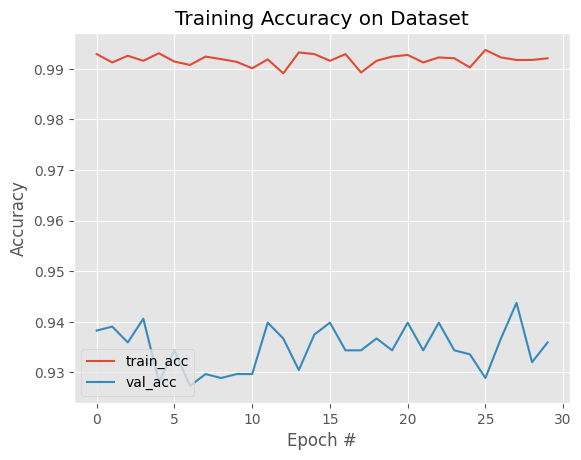

In [26]:
# plot the training loss and accuracy
# construct the argument parser and parse the arguments

# ap = argparse.ArgumentParser()
# ap.add_argument("-h", "--plot", type=str, default="plot.png",
# 	help="path to output loss/accuracy plot")
# args = vars(ap.parse_args())
import matplotlib.pyplot as plt
import easydict

args = easydict.EasyDict({
        "plot" : 'plot.png',
    })

N = N_EPOCH
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

# plt.plot(np.arange(0, N), H.history["AUC"], label="train_AUC")
# plt.plot(np.arange(0, N), H.history["val_AUC"], label="val_AUC")
plt.title("Training Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

### AUC 시각화

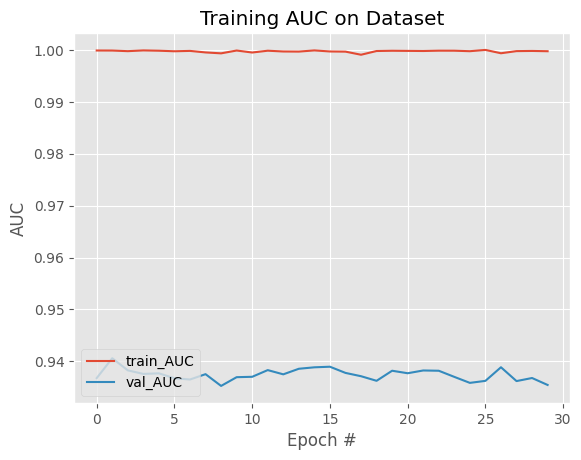

In [27]:
# plot the training loss and accuracy
# construct the argument parser and parse the arguments

# ap = argparse.ArgumentParser()
# ap.add_argument("-h", "--plot", type=str, default="plot.png",
# 	help="path to output loss/accuracy plot")
# args = vars(ap.parse_args())
import easydict

args = easydict.EasyDict({
        "plot" : 'plot.png',
    })

N = N_EPOCH
plt.style.use("ggplot")
plt.plot(np.arange(0, N), H.history["AUC"], label="train_AUC")
plt.plot(np.arange(0, N), H.history["val_AUC"], label="val_AUC")
plt.title("Training AUC on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("AUC")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

### Loss값 시각화

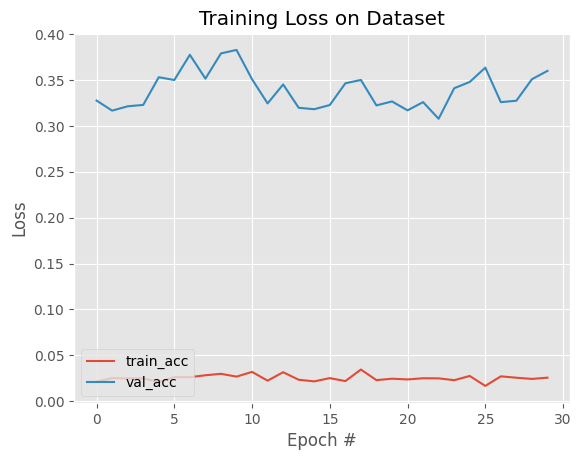

In [28]:
# plot the training loss and accuracy
# construct the argument parser and parse the arguments

# ap = argparse.ArgumentParser()
# ap.add_argument("-h", "--plot", type=str, default="plot.png",
# 	help="path to output loss/accuracy plot")
# args = vars(ap.parse_args())
import easydict

args = easydict.EasyDict({
        "plot" : 'plot.png',
    })

N = N_EPOCH
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["loss"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_acc")

# plt.plot(np.arange(0, N), H.history["AUC"], label="train_AUC")
# plt.plot(np.arange(0, N), H.history["val_AUC"], label="val_AUC")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

### validation 성능

In [40]:
loss, accuracy, AUC = model.evaluate_generator(validation_generator,steps =validation_generator.samples // BATCH_SIZE+1)
print('Test accuracy :', accuracy)
print('Test AUC :',AUC)
print('Loss :',loss)

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/995720920.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy, AUC = model.evaluate_generator(validation_generator,steps =validation_generator.samples // BATCH_SIZE+1)


Test accuracy : 0.9309064149856567
Test AUC : 0.9832963943481445
Loss : 0.37747815251350403


### test 성능

In [39]:
from keras.utils import to_categorical
from sklearn.metrics import f1_score, precision_score, recall_score


# Get the predictions for the test set
predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)

# Convert the predictions and true labels into one-hot encoded form
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
y_pred_onehot = to_categorical(train_generator.labels)

# Compute the evaluation metrics
loss, accuracy, auc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
f1_score = f1_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

# Print the evaluation metrics
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test AUC:", auc)
print("Test F1 score:", f1_score)
print("Test precision:", precision)
print("Test recall:", recall)


/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/524487126.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


8/8 [==============================] - 7s 897ms/step


/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/524487126.py:14: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy, auc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)


8/8 [==============================] - 7s 878ms/step - loss: 0.3855 - accuracy: 0.9211 - AUC: 0.9813
Test loss: 0.3854639232158661
Test accuracy: 0.9210526347160339
Test AUC: 0.9812819957733154
Test F1 score: 0.9167223649070986
Test precision: 0.926472793494764
Test recall: 0.9094343147649908


In [30]:
test_generator.classes

array([ 0,  0,  0, ..., 20, 20, 20], dtype=int32)

In [31]:
targets = test_generator.class_indices.keys()

/var/folders/0q/f448gzfd2rd9vk0q5h6wlvn80000gn/T/ipykernel_2164/1078514530.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator, test_generator.samples // BATCH_SIZE+1)


ROC AUC score: 0.9527171179418067


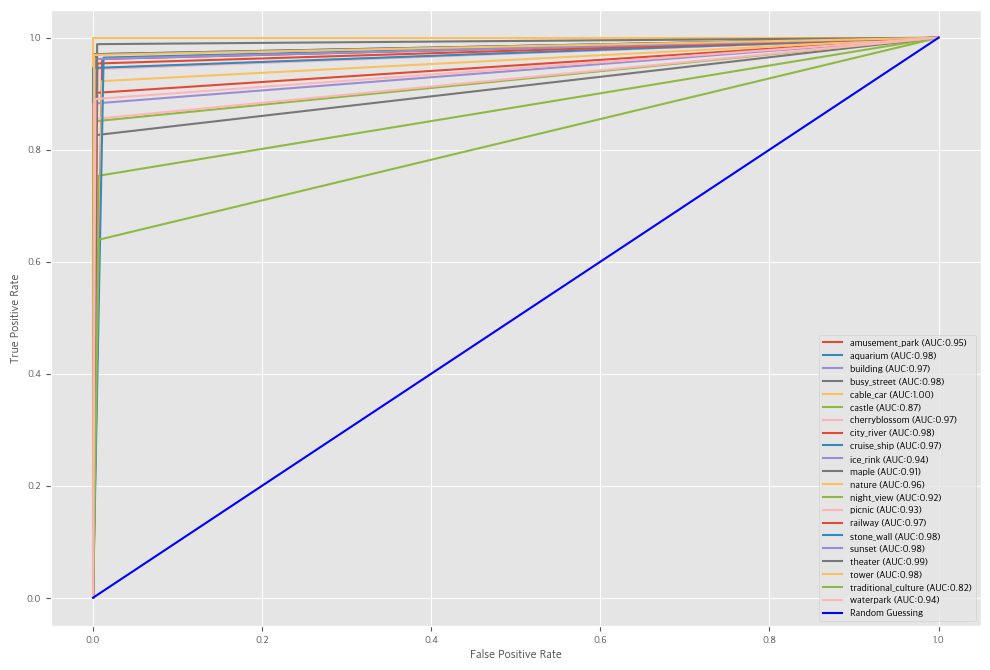

In [32]:
from sklearn.metrics import multilabel_confusion_matrix

Y_pred = model.predict_generator(test_generator, test_generator.samples // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)

y_test = test_generator.classes

import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.font_manager as fm

import matplotlib as mpl
from matplotlib import font_manager, rc

font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc' # Mac에서 사용하는 기본 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams["font.size"] = 7  # 폰트 크기 설정


target= targets

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()